# Machine Learning: Regressions

Qintong Li

28/07/2023

----


Life expectancy prediction:  we are going to build a regression model to predict life expectancy based multiple factors. This analysis can help identify factors that affect life expectancy and guide public health initiatives.

Data source: https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from scipy import stats

import seaborn as sns
import sklearn

In [2]:
df= pd.read_csv("/content/healthy_lifestyle_city_2021.csv")
df.head(10)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


## Perfom any approriate data cleaning and transformation

In [3]:
df.isnull().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


Check the column 'Sunshine hours(City)','Cost of a bottle of water(City)', 'Obesity levels(Country)', 'Life expectancy(years) (Country)', 'Pollution(Index score) (City)', 'Annual avg. hours worked', 'Cost of a monthly gym membership(City)' have the right data types since the have a object datatype.

In [5]:
df.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

Remove symbols in numerical columns and change the datatype to float or int.

In [6]:
df['Cost of a bottle of water(City)']=df['Cost of a bottle of water(City)'].str.replace('£', '')

In [7]:
df['Cost of a monthly gym membership(City)']=df['Cost of a monthly gym membership(City)'].str.replace('£', '')

In [8]:
df['Obesity levels(Country)']=df['Obesity levels(Country)'].str.replace('%', '')

In [9]:
df = df.replace('-',0)

In [10]:
df['City']=df['City'].astype(str)
df['Cost of a bottle of water(City)']=df['Cost of a bottle of water(City)'].astype(float)
df['Cost of a monthly gym membership(City)']=df['Cost of a monthly gym membership(City)'].astype(float)
df['Obesity levels(Country)']=df['Obesity levels(Country)'].astype(float)
df['Sunshine hours(City)']=df['Sunshine hours(City)'].astype(int)
df['Pollution(Index score) (City)']=df['Pollution(Index score) (City)'].astype(float)
df['Annual avg. hours worked']=df['Annual avg. hours worked'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     int64  
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     float64
 7   Annual avg. hours worked                44 non-null     float64
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


We are going to check if there is the presence of outliers in our data of interest using a boxplot:

In [12]:
df.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [13]:
variables_of_interest = ['Rank','Life expectancy(years) (Country)', 'Sunshine hours(City)', 'Pollution(Index score) (City)','Cost of a bottle of water(City)',
                        'Obesity levels(Country)', 'Annual avg. hours worked', 'Happiness levels(Country)',
                        'Outdoor activities(City)', 'Number of take out places(City)','Cost of a monthly gym membership(City)'
                        ]

# Create a box plot
fig = px.box(df, y=variables_of_interest)

# Display the plot
fig.show()


### Analysis using box plots

Components of a box plot:
- Box: represents the interquartile range (IQR)
- Line inside the box: the median
- Whiskers: extending from the box. The whiskers typically extend to the minimum and maximum non-outlier values within a certain range
- Individual data points beyond this range: data considered outliers.

![Illustration of a box plot with each compoment](https://www.simplypsychology.org/wp-content/uploads/box-whisker-plot.jpg)

### Identifying outliers

**Identify outliers: Any data points that fall below the lower threshold or above the upper threshold are considered outliers and can be represented as individual data points beyond the whiskers.**

By examining the box plot, you can visually identify the presence of outliers as data points located beyond the whiskers. These outliers may be potential anomalies or extreme values that deviate significantly from the majority of the data.

## Effective methods for independant variables selection

When selecting independent variables for a linear regression model, there are several metrics and techniques you can use to aid in the evaluation and decision-making process. Here are some commonly used metrics:

- Before splitting data into train-test sets
  1. Correlation: Calculate the correlation coefficients between each independent variable and the dependent variable. Variables with higher absolute correlation values indicate a stronger linear relationship with the dependent variable and may be good candidates for inclusion in the model.
  2. VIF (Variance Inflation Factor): Compute the VIF for each independent variable to assess multicollinearity. The VIF quantifies how much the variance of an estimated regression coefficient is increased due to multicollinearity. Higher VIF values suggest stronger multicollinearity, indicating that the variable may need to be evaluated for potential removal or further investigation.
  3. AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion): These metrics measure the goodness-of-fit of a statistical model while penalizing for model complexity. Lower AIC or BIC values indicate a better balance between model fit and complexity. Consider comparing models with different sets of independent variables and select the model with the lowest AIC or BIC value. Relavant article reading: https://www.statology.org/bic-in-python/
  4. Hypothesis Testing: Conduct hypothesis tests, such as t-tests or F-tests, to determine if individual independent variables or groups of variables significantly contribute to the model. Variables with p-values below a predetermined significance level (e.g., 0.05) can be considered for inclusion.
  5. Pair plots: identify potential relationships between varibales.

- After tran-test splitting
  1. Feature Importance/Ranking: Utilize various feature importance or ranking techniques to assess the relative importance of independent variables. Some machine learning algorithms that provide feature importance scores (e.g., random forests, gradient boosting).
  3. Sk-learn library feature selection.
  2. Cross-Validation: Employ cross-validation techniques, such as k-fold cross-validation or holdout validation, to evaluate the model's performance with different sets of independent variables. This helps assess the stability and generalizability of the model's performance across different data subsets.
  

These metrics and techniques provide insights into the relevance, importance, and multicollinearity of independent variables. It is recommended to use a combination of these metrics and evaluate the results from different angles to make informed decisions about variable selection for your linear regression model.

### 1. Correlation matrix

Correlation: Calculate the correlation coefficients between each independent variable and the dependent variable. Variables with higher absolute correlation values indicate a stronger linear relationship with the dependent variable and may be good candidates for inclusion in the model.

<ipython-input-14-cb44cbc9481b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



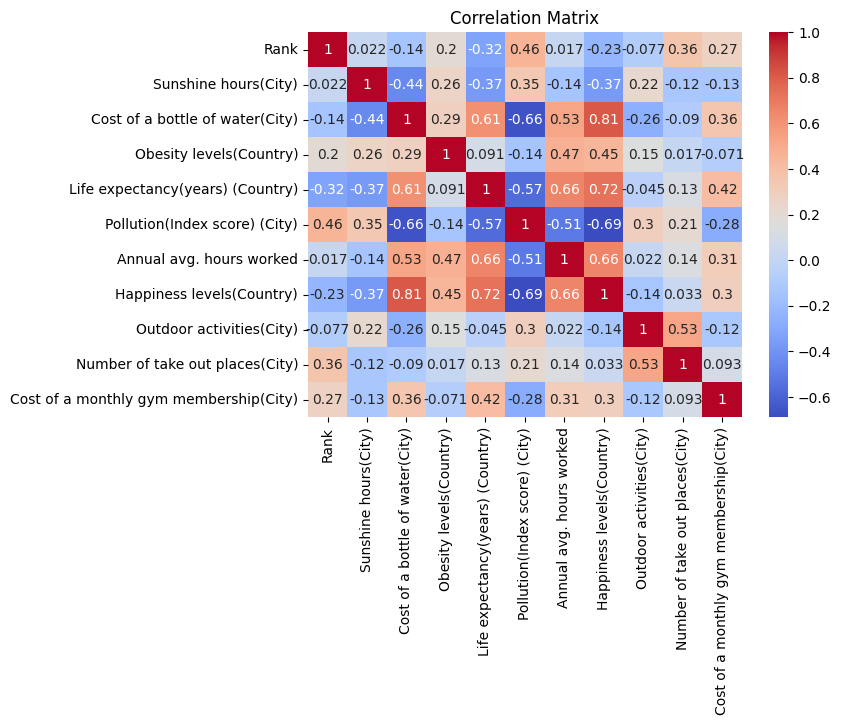

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 2. VIF

VIF (Variance Inflation Factor): Compute the VIF for each independent variable to assess multicollinearity. The VIF quantifies how much the variance of an estimated regression coefficient is increased due to multicollinearity. **Higher VIF values** suggest **stronger multicollinearity**, indicating that the variable may need to be evaluated for potential removal or further investigation.

More details see link: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['Rank','Life expectancy(years) (Country)', 'Sunshine hours(City)', 'Pollution(Index score) (City)','Cost of a bottle of water(City)',
                        'Obesity levels(Country)', 'Annual avg. hours worked', 'Happiness levels(Country)',
                        'Outdoor activities(City)', 'Number of take out places(City)','Cost of a monthly gym membership(City)']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)

                                   feature         VIF
0                                     Rank   18.309657
1         Life expectancy(years) (Country)  281.351918
2                     Sunshine hours(City)   23.543232
3            Pollution(Index score) (City)   24.712957
4          Cost of a bottle of water(City)   13.431243
5                  Obesity levels(Country)   23.182859
6                 Annual avg. hours worked    8.812220
7                Happiness levels(Country)  287.311612
8                 Outdoor activities(City)   11.076922
9          Number of take out places(City)    5.375458
10  Cost of a monthly gym membership(City)   19.654587


> **Generally, a VIF above 5 indicates a high multicollinearity.**

Use regularization techniques: Regularization methods, such as **ridge regression** or **lasso regression**, can handle multicollinearity by applying a penalty that shrinks the regression coefficients. These techniques can help in estimating coefficients more reliably when multicollinearity is present.

### 3. AIC and BIC

AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion): These metrics measure the goodness-of-fit of a statistical model while penalizing for model complexity. **Lower AIC or BIC values** indicate a **better balance between model fit and complexity**. Consider comparing models with different sets of independent variables and select the model with the lowest AIC or BIC value. Relavant article reading: https://www.statology.org/bic-in-python/

See example in the first ML example.

### 4. Hypothesis testing

Conduct hypothesis tests, such as t-tests or F-tests, to determine if individual independent variables or groups of variables significantly contribute to the model. Variables with p-values below a predetermined significance level (e.g., 0.05) can be considered for inclusion.

In [16]:
f_statistic, p_value = stats.f_oneway(df['Sunshine hours(City)'], df['Cost of a bottle of water(City)'], df['Obesity levels(Country)'],
                                      df['Life expectancy(years) (Country)'],df['Pollution(Index score) (City)'],df['Annual avg. hours worked'],
                                      df['Happiness levels(Country)'],df['Outdoor activities(City)'],df['Number of take out places(City)'],
                                      df['Cost of a monthly gym membership(City)'])

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 95.19408221193984
P-value: 1.4246304296418679e-96


In [17]:
# The null hypothesis in ANOVA assumes that the means of all the groups are equal.

alpha= 0.05
if p_value < alpha:
    print("The null hypothesis is rejected, there is a significant difference among all variables of interest.")
else:
    print("the null hypothesis is not rejected, there is no significant difference among all variables of interest.")

The null hypothesis is rejected, there is a significant difference among all variables of interest.


> **When the p-value is smaller than the significance level, it suggests that there is sufficient evidence to reject the null hypothesis. In other words, it indicates that at least one group's mean is significantly different from the others.**

### 5. Pair Plot

The distribution of the data and potential relationship can be observed with a pairplot:

The multiple linear regression model assumes a linear relationship between the independent variables and the dependent variable. Linearity between the variables of interests need to be checked!

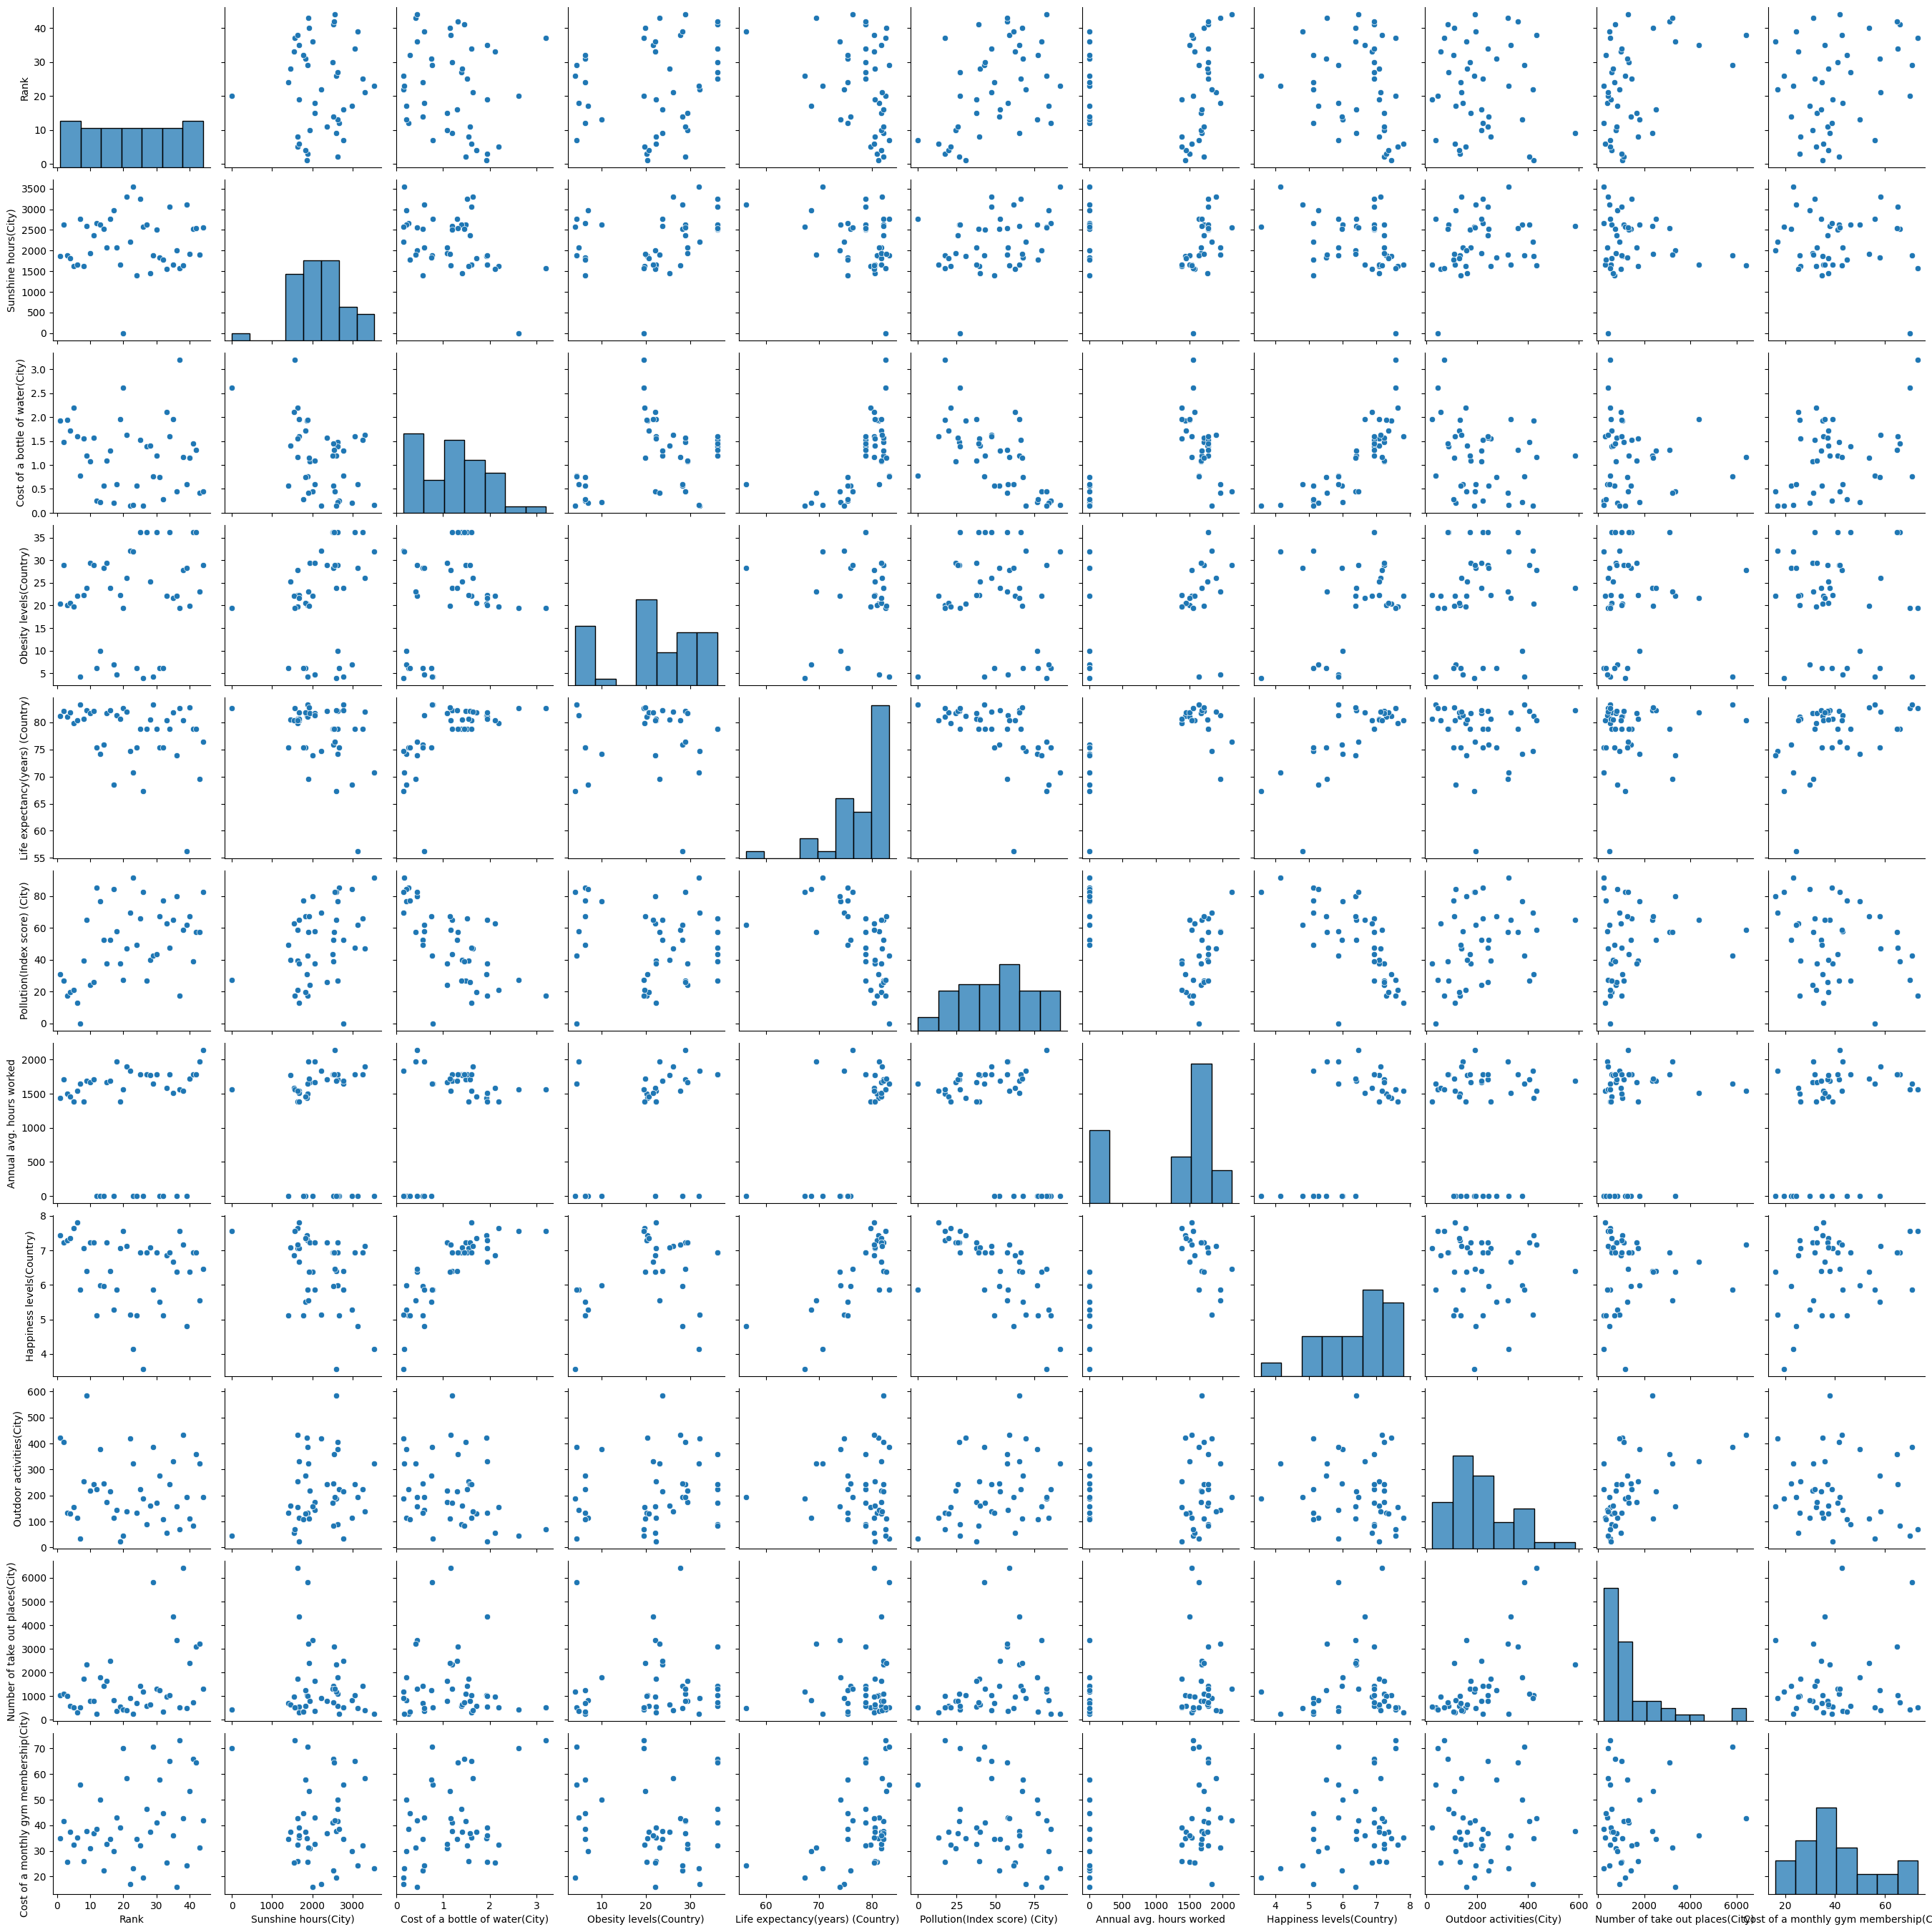

In [18]:

# sns.set(rc={'figure.figsize':(12,8)})
sns.pairplot(df)

Choose independent variables based on the above analysis:

In [19]:
independent_vars= [ 'Sunshine hours(City)','Annual avg. hours worked', 'Cost of a bottle of water(City)',
                     'Obesity levels(Country)', 'Happiness levels(Country)','Cost of a monthly gym membership(City)'
                  ]

dependent_var='Life expectancy(years) (Country)' # our target/predictor

In [20]:
X=df[independent_vars]
y=df[dependent_var]

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Mean Squared Error (MSE): 1.3


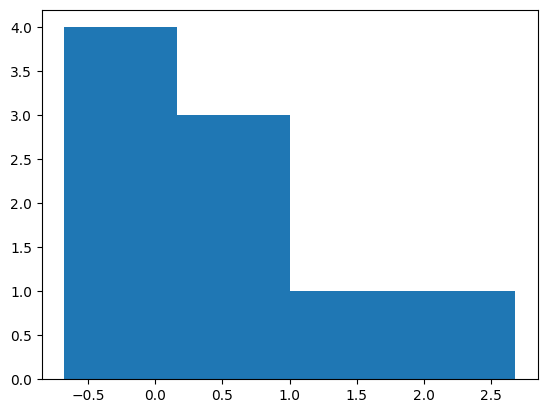

In [22]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # use a test size between 20-30%

# Create and fit the Ridge Regression model
ridge = Ridge(alpha=1.0)  # Alpha is the regularization parameter
ridge.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
d = {'Target values':y_test.values,
     'Predicted life expectancy': y_pred}

df_result = pd.DataFrame(d)
print("Mean Squared Error (MSE):", round(mse,2))
# print("prediction values:", y_pred)
# print('target values:',y_test)

plt.hist(y_test-y_pred,bins = 4)
plt.show()

In [23]:
import statsmodels.api as sm

# Adding a constant term for the intercept
data= sm.add_constant(df)

# Creating the model
model= sm.OLS(df[dependent_var], df[independent_vars])

# Fitting the model
results= model.fit()

# Printing the regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Life expectancy(years) (Country)   R-squared (uncentered):                   0.995
Model:                                          OLS   Adj. R-squared (uncentered):              0.994
Method:                               Least Squares   F-statistic:                              1284.
Date:                              Tue, 18 Jul 2023   Prob (F-statistic):                    2.78e-42
Time:                                      16:39:15   Log-Likelihood:                         -137.35
No. Observations:                                44   AIC:                                      286.7
Df Residuals:                                    38   BIC:                                      297.4
Df Model:                                         6                                                  
Covariance Type:                          nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Sunshine hours(City)                       0.0050      0.002      3.264      0.002       0.002       0.008
Annual avg. hours worked                8.035e-05      0.002      0.049      0.961      -0.003       0.003
Cost of a bottle of water(City)           -5.1822      2.076     -2.496      0.017      -9.385      -0.980
Obesity levels(Country)                   -0.3614      0.120     -3.011      0.005      -0.604      -0.118
Happiness levels(Country)                 12.0249      0.843     14.260      0.000      10.318      13.732
Cost of a monthly gym membership(City)     0.0817      0.068      1.199      0.238      -0.056       0.220
==============================================================================
Omnibus:                        2.352   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                1.776
Skew:                           0.492   Prob(JB):                        0.411
Kurtosis:                       3.040   Cond. No.                     6.27e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Evaluation metrics for regression model performance

Some of the commonly used metrics include:

1. Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted and actual values. It provides a measure of the average magnitude of the errors, regardless of their direction. Lower MAE values indicate better model performance.

2. Root Mean Square Error (RMSE): RMSE is similar to MSE, but it takes the square root of the average squared difference between the predicted and actual values. RMSE provides a measure of the average magnitude of the errors in the original units of the target variable. Like MSE, lower RMSE values indicate better model performance.

3. R-squared (R²): R-squared represents the proportion of variance in the dependent variable that is explained by the independent variables in the regression model. It ranges from 0 to 1, with higher values indicating a better fit. R-squared is often used to assess the goodness-of-fit of the model, but it does not provide information about the magnitude or direction of errors.

4. Adjusted R-squared: Adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the model. It penalizes the addition of unnecessary variables and provides a more conservative measure of model fit.

5. Mean Percentage Error (MPE) or Mean Absolute Percentage Error (MAPE): These metrics express the average percentage difference between the predicted and actual values. They are useful when you want to evaluate the performance of the model in terms of relative errors rather than absolute errors.

Both mean square error (MSE) and R-squared (R²) are commonly used metrics to evaluate the performance of a linear regression model, but they provide different types of information about the model's performance:

- MSE measures the average squared difference between the predicted and actual values. It quantifies the overall magnitude of the errors in the model's predictions. Lower MSE values indicate better prediction accuracy. MSE is particularly useful when the focus is on **minimizing the magnitude of the errors**, and it provides a straightforward and easily interpretable metric.

- R-squared represents the proportion of variance in the dependent variable that is explained by the independent variables in the regression model. It ranges from 0 to 1, with **higher values** indicating a **better fit**. R-squared is useful in assessing how well the model captures the variability in the data. However, it does not directly indicate the magnitude or direction of the errors.

In general, both metrics should be considered together when evaluating a linear regression model:

> - MSE: provides information about the magnitude of the errors and the accuracy of the model's predictions. It is useful for assessing the predictive **performance of the model**.
- R-squared: provides information about the goodness-of-fit of the model. It indicates **how well the independent variables explain the variability in the dependent variable**. A higher R-squared value suggests that the model captures a larger portion of the variation in the data.


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# apply scaler() to all the numeric columns
numeric_vars = ['Rank', 'Life expectancy(years) (Country)','Sunshine hours(City)', 'Pollution(Index score) (City)','Cost of a bottle of water(City)',
                        'Obesity levels(Country)', 'Annual avg. hours worked', 'Happiness levels(Country)',
                        'Outdoor activities(City)', 'Number of take out places(City)','Cost of a monthly gym membership(City)']
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])
df.head()


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,0.000000,0.524562,0.580328,0.510836,0.925651,0.337148,0.671034,0.914894,0.709964,0.129398,0.330119
1,Sydney,0.023256,0.744212,0.436066,0.777090,0.959108,0.292784,0.801123,0.862884,0.681495,0.138317,0.448633
2,Vienna,0.046512,0.531903,0.586885,0.501548,0.918216,0.188903,0.702387,0.879433,0.193950,0.122912,0.169530
3,Stockholm,0.069767,0.514116,0.514754,0.517028,0.947955,0.213974,0.679457,0.893617,0.188612,0.056429,0.372370
4,Copenhagen,0.093023,0.460192,0.668852,0.489164,0.873606,0.231524,0.645765,0.962175,0.233096,0.044268,0.288569


In [25]:
X_features = df[['Rank', 'Sunshine hours(City)', 'Pollution(Index score) (City)','Cost of a bottle of water(City)',
                        'Obesity levels(Country)', 'Annual avg. hours worked', 'Happiness levels(Country)',
                        'Outdoor activities(City)', 'Number of take out places(City)','Cost of a monthly gym membership(City)']]
y_feature = df['Life expectancy(years) (Country)']

# Split the data into training and test sets
X_train_unfiltered, X_test_unfiltered, y_train_unfiltered, y_test_unfiltered = train_test_split(X_features,
                                                                                                y_feature,
                                                                                                test_size=0.2,
                                                                                                random_state=10)


## 1. Feature importance: Built-in inspection methods from machine learning algorithm

Feature Importance/Ranking: Utilize various feature importance or ranking techniques to assess the relative importance of independent variables. Some methods include statistical tests (e.g., t-tests, ANOVA), information gain, recursive feature elimination, or machine learning algorithms that provide feature importance scores (e.g., random forests, gradient boosting).

More explicitly, we can use the function of random forest from sklearn, here are some packages we need:

> `from sklearn.model_selection import train_test_split`

> `from sklearn.ensemble import RandomForestRegressor`

> `from sklearn.inspection import permutation_importance`

> `from matplotlib import pyplot as plt`

More details can be found in this article: https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [27]:
rf = RandomForestRegressor(n_estimators=15)
rf.fit(X_train_unfiltered, y_train_unfiltered)

RandomForestRegressor(n_estimators=15)

Text(0.5, 0, 'Feature Importance')

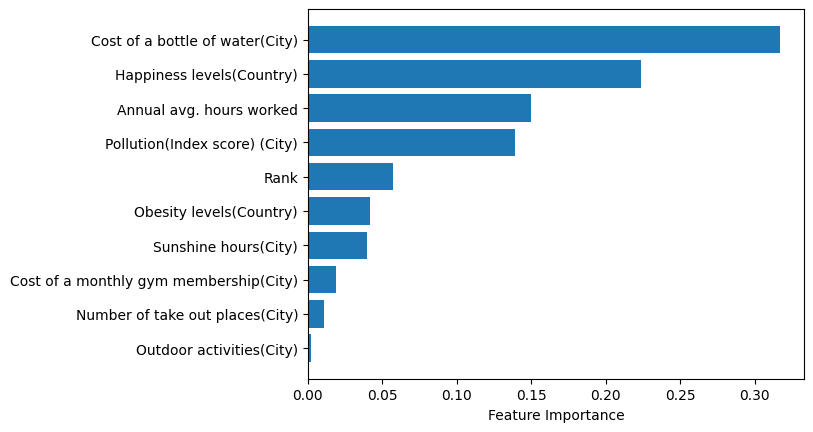

In [28]:
sort = rf.feature_importances_.argsort()
plt.barh(X_features.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

### 2. sk-learn.feature_selection

The classes in the `sklearn.feature_selection` module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

https://scikit-learn.org/stable/modules/feature_selection.html

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [81]:
# Using select feature from sklearn
lm = LinearRegression()
lm.fit(X_train_unfiltered, y_train_unfiltered)


rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train_unfiltered, y_train_unfiltered)

In [82]:
list(zip(X_train_unfiltered.columns,rfe.support_,rfe.ranking_))

[('Rank', True, 1),
 ('Sunshine hours(City)', True, 1),
 ('Pollution(Index score) (City)', True, 1),
 ('Cost of a bottle of water(City)', True, 1),
 ('Obesity levels(Country)', True, 1),
 ('Annual avg. hours worked', True, 1),
 ('Happiness levels(Country)', True, 1),
 ('Outdoor activities(City)', True, 1),
 ('Number of take out places(City)', True, 1),
 ('Cost of a monthly gym membership(City)', True, 1)]

All variables are selected by the algorithm, we can carry on training model with selected variables.

### 3. Cross Validation

Cross-Validation: Employ cross-validation techniques, such as k-fold cross-validation or holdout validation, to evaluate the model's performance with different sets of independent variables. This helps assess the stability and generalizability of the model's performance across different data subsets.

Relevant readings:
https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression

Example see below.

In [83]:
# predict life expectancy
y_pred_2 = rfe.predict(X_test_unfiltered)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test_unfiltered, y_pred_2)
print(r2)

-0.3048738240069444


In [84]:
# k-fold CV (using all variables)

scores = cross_val_score(lm, X_train_unfiltered, y_train_unfiltered, scoring='r2', cv=5)
scores

array([ 0.58903648, -6.83389336, -0.08510435,  0.27996565,  0.81042254])

In [85]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train_unfiltered, y_train_unfiltered, scoring='r2', cv=folds)
scores


array([-5.38632849,  0.31474229, -0.64108842,  0.58503197,  0.44042901])

In [86]:
len(X_train_unfiltered.columns)

10

In [87]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 11))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train_unfiltered, y_train_unfiltered)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_unfiltered, y_train_unfiltered)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression(),
                           n_features_to_select=10),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [88]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010419,0.001318,0.001326,0.000134,1,{'n_features_to_select': 1},-15.008186,0.427510,0.129612,0.012785,...,-2.762009,6.126934,10,0.281290,0.514013,0.117985,0.508114,0.487260,0.381732,0.157644
1,0.014073,0.003753,0.001718,0.000527,2,{'n_features_to_select': 2},-10.385554,0.345219,0.052837,0.208843,...,-1.835154,4.279015,8,0.431635,0.583522,0.567652,0.655506,0.550246,0.557712,0.072498
2,0.010101,0.001160,0.001402,0.000116,3,{'n_features_to_select': 3},-13.184369,0.357742,0.229405,0.331733,...,-2.331824,5.427687,9,0.559449,0.667935,0.673844,0.728242,0.634230,0.652740,0.055539
3,0.008901,0.001863,0.001348,0.000070,4,{'n_features_to_select': 4},-5.475618,0.356012,0.317019,0.418761,...,-0.745039,2.368264,3,0.712716,0.710217,0.757004,0.749514,0.677151,0.721320,0.029039
4,0.007371,0.001783,0.001404,0.000436,5,{'n_features_to_select': 5},-3.965672,0.324991,0.244318,0.544437,...,-0.485414,1.743023,2,0.737807,0.718861,0.775447,0.792602,0.705615,0.746067,0.033086
5,0.007489,0.001254,0.001500,0.000161,6,{'n_features_to_select': 6},-4.879876,0.245076,0.106772,0.548628,...,-0.816537,2.042677,4,0.748385,0.728004,0.787552,0.800043,0.739941,0.760785,0.028002
6,0.005334,0.000811,0.001505,0.000270,7,{'n_features_to_select': 7},-3.443572,0.399700,0.258620,0.577770,...,-0.372301,1.539176,1,0.765629,0.800804,0.823088,0.806921,0.805368,0.800362,0.018927
7,0.005287,0.001385,0.001500,0.000363,8,{'n_features_to_select': 8},-5.597651,0.434114,-0.048242,0.571381,...,-0.857372,2.379097,6,0.798412,0.816590,0.858508,0.807277,0.816382,0.819434,0.020659
8,0.003748,0.000659,0.001376,0.000178,9,{'n_features_to_select': 9},-5.244849,0.363503,-0.351641,0.580845,...,-0.844293,2.223643,5,0.801665,0.818009,0.864955,0.807418,0.818002,0.822010,0.022375
9,0.002566,0.000191,0.001669,0.000614,10,{'n_features_to_select': 10},-5.386328,0.314742,-0.641088,0.585032,...,-0.937443,2.265605,7,0.801704,0.818401,0.880786,0.807460,0.818081,0.825286,0.028473


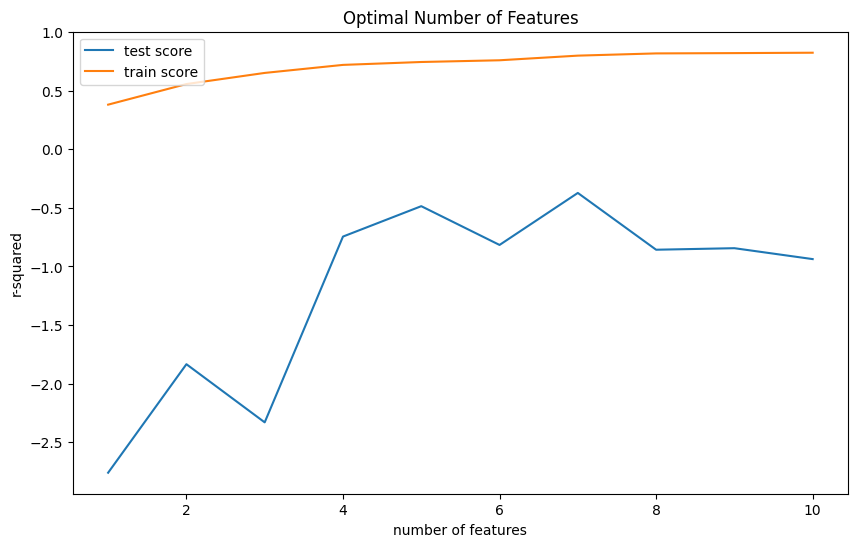

In [89]:
# plotting cv results
plt.figure(figsize=(10,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [90]:
# final model
n_features_optimal = 8

# lm = LinearRegression()
# lm.fit(X_train_unfiltered, y_train_unfiltered)

rfe = RFE(lm, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train_unfiltered, y_train_unfiltered)

# predict prices of X_test
y_pred_3 = rfe.predict(X_test_unfiltered)
r2_2 = sklearn.metrics.r2_score(y_test_unfiltered, y_pred_3)
print(r2_2)

-0.10570224282119978


## Conclusion

- Negative $R^{2}$ implies that a linear regression model might not be the best model for predicting the life expectancy using the existing variables.
- Further refinement of the model is warranted to address its instability and insufficient performance.
- Insufficient data may also contribute to its limitations.
- This example underscores the fundamental steps involved in machine learning training.

For future projects, the selection of appropriate methods should be contingent upon careful consideration of the specific context, warranting thorough study and analysis.